In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [64]:
data = pd.read_csv("outputs/out.txt", header=None, names=["mode", "alpha", "c", "epsilon", "initial", "reward"])
data

,mode,alpha,c,epsilon,initial,reward
0,greedy,0.0000,1.00,0.250000,0.0,1.259446
1,greedy,0.0000,1.00,0.125000,0.0,1.375608
2,greedy,0.0000,1.00,0.062500,0.0,1.396925
3,greedy,0.0000,1.00,0.031250,0.0,1.351096
4,greedy,0.0000,1.00,0.015625,0.0,1.233204
5,greedy,0.1500,1.00,0.250000,0.0,1.245861
6,greedy,0.1500,1.00,0.125000,0.0,1.363547
7,greedy,0.1500,1.00,0.062500,0.0,1.398490
8,greedy,0.1500,1.00,0.031250,0.0,1.399463
9,greedy,0.1500,1.00,0.015625,0.0,1.393254


In [69]:
ex1 = data.loc[(data["mode"] == "greedy") & (data["alpha"] == 0)]
ex2 = data.loc[(data["mode"] == "greedy") & (data["alpha"] > 0) & (data["initial"] == 0)]
ex3 = data.loc[(data["mode"] == "greedy") & (data["alpha"] > 0) & (data["initial"] > 0)]
ex4 = data.loc[(data["mode"] == "ucb")]
ex5 = data.loc[(data["mode"] == "gradient")]

ex1,ex2,ex3,ex4,ex5

(     mode  alpha    c   epsilon  initial    reward
 0  greedy    0.0  1.0  0.250000      0.0  1.259446
 1  greedy    0.0  1.0  0.125000      0.0  1.375608
 2  greedy    0.0  1.0  0.062500      0.0  1.396925
 3  greedy    0.0  1.0  0.031250      0.0  1.351096
 4  greedy    0.0  1.0  0.015625      0.0  1.233204,
      mode  alpha    c   epsilon  initial    reward
 5  greedy   0.15  1.0  0.250000      0.0  1.245861
 6  greedy   0.15  1.0  0.125000      0.0  1.363547
 7  greedy   0.15  1.0  0.062500      0.0  1.398490
 8  greedy   0.15  1.0  0.031250      0.0  1.399463
 9  greedy   0.15  1.0  0.015625      0.0  1.393254,
       mode  alpha    c   epsilon  initial    reward
 10  greedy   0.15  1.0  0.062500      1.0  1.458631
 11  greedy   0.15  1.0  0.031250      1.0  1.490420
 12  greedy   0.15  1.0  0.015625      1.0  1.504550
 13  greedy   0.15  1.0  0.007812      1.0  1.511494,
    mode  alpha     c  epsilon  initial    reward
 14  ucb    0.0  0.25      0.1      0.0  1.527674
 15  ucb

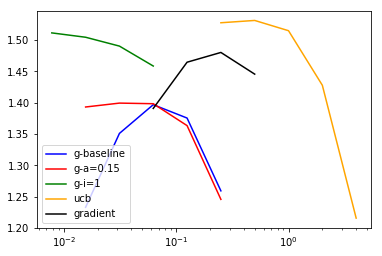

In [84]:
plt.xscale("log")
plt.plot(ex1.epsilon, ex1.reward, c="blue", label="g-baseline")
plt.plot(ex2.epsilon, ex2.reward, c="red", label="g-a=0.15")
plt.plot(ex3.epsilon, ex3.reward, c="green", label="g-i=1")
plt.plot(ex4.c, ex4.reward, c="orange", label="ucb")
plt.plot(ex5.alpha, ex5.reward, c="black", label="gradient")
plt.legend()

plt.savefig("plot.png")
plt.show()